# VisionAgent Tutorial - Counting Cans


## Table of Contents
1. [Create a Coding Agent](#create-a-coding-agent)
2. [Generate Code](#generate-code)
3. [Test Generated Code](#test-generated-code)

In this Jupyter notebook, we guide you through the comprehensive process of using VisionAgent to generate code that detects and counts cans from an image. Each section is crafted to provide you with a conceptual understanding of the step in the process and practical code examples. 

 By the end of this notebook, not only will you have a functioning Python script that can count cans, but you'll also understand more about how VisionAgent works. Whether you're aiming to recognize faces, track objects, or read text from images, the principles and methods showcased here will serve as a valuable cornerstone for your future projects.

In [1]:
# Install VisionAgent
!pip install vision-agent


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Prerequisite

In order to run below example, you will need to provide an Anthropic API key from your Anthropic account. Supply your key in below cell. We will set it as an environment variable so VisionAgent can load it later.

In [2]:
import os

# TODO: fill below with your API key
os.environ["ANTHROPIC_API_KEY"] = "YOUR_ANTHROPIC_API_KEY"

## Problem Context - Cans Inventory Status

In this example, we want to write a program that counts cans in an image, and outputs the percentage of inventory and the inventory status. 

We have an image of cans, and we know the maximum capacity of the inventory in the image is 35 cans. If the inventory is below 50%, we want the program to output a status of "Needs Restocking." If the inventory is above 50%, it should output a status of "Healthy."

## Create a Coding Agent Instance

In order to generate code, we need to first create a coding agent instance.

In [3]:
from vision_agent.agent.vision_agent_coder_v2 import VisionAgentCoderV2

# set verbose to True so we can see logs of the code generation process.
agent = VisionAgentCoderV2(verbose=True)

## Generate Code

To generate code, you need to provide two inputs to the agent:

1. An input image
2. A prompt string that describes your vision task.

Let's first prepare the input image.

### Step 1 - Prepare an input image

We have prepared an input image in a http url format. Let's download it to disk, and name it `"soda_cans.png"`.

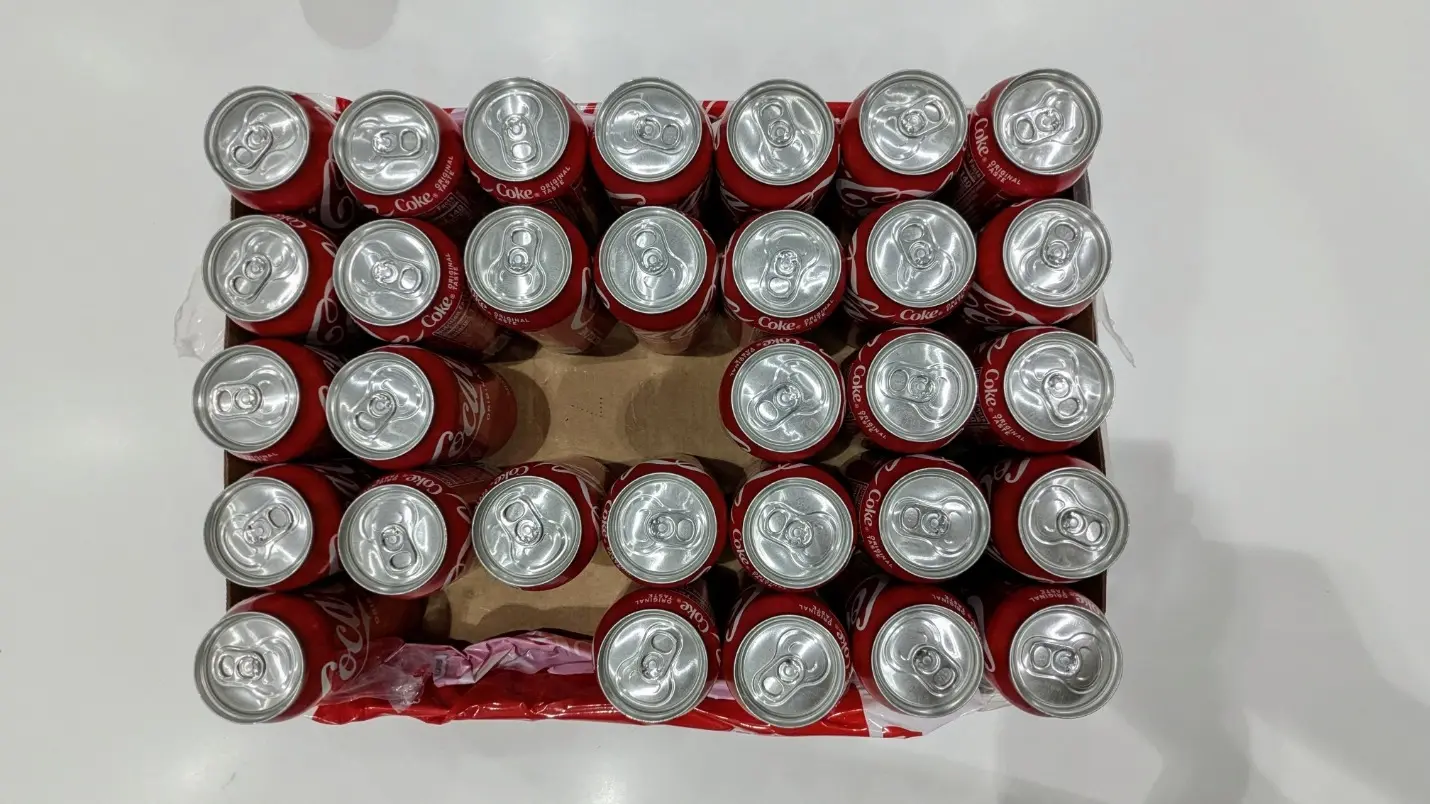

In [4]:
from vision_agent.tools import load_image
import PIL.Image

input_image_url = "https://drive.usercontent.google.com/u/0/uc?id=1OMt6GmUi-xBW0cDUi1lOEINXmgQVnpOM"

img_np = load_image(input_image_url)
img_pil = PIL.Image.fromarray(img_np)
image_path = "soda_cans.png"
img_pil.save(image_path)

# Let's see the image
img_pil

### Step 2 - Write a prompt

Now we need to write a prompt that describes the vision task that we want VisionAgent to generate code for.

Below is the prompt we wrote for this task.

In [5]:
user_prompt = """
Write a program that counts soda cans in an image.
The program should output the count, draw bounding boxes around each detected can,
and display the confidence score for each prediction. Additionally, calculate the
inventory percentage based on a maximum capacity of 35 cans. If the inventory is
below 50%, the program should output a status of "Needs Restocking." If the
inventory is above 50%, it should output a status of "Healthy."""

### Code Generation Process

What happens under the hood is that the agent will generate a plan for the code generation task, and then generate code and test case based on the plan. Then the agent will test the generated code with the test case. If the test case fails, the agent will iterate on the code generation process until the test case passes.


> Tip: you may need to tweak the prompt, or even the input image to get the desired result. 


The `generate_code()` method expects a list of dictionary as input messages, similar to the [OpenAI chat completion API](https://platform.openai.com/docs/api-reference/chat/create).

The first message is always the user prompt.


In [6]:

# We just supplied the first message since this is the start of the conversation.
messages = [
    {
        "role": "user",
        "content": user_prompt,
        "media": [image_path],
    }
]

response = agent.generate_code(messages)

Step 10: First, I need to understand what's in the image and get suggestions for how to approach this task. I'll 
load the image and use claude35_vqa and suggestion functions to get initial guidance.

Code to Execute:

============================== Code ==============================

  1                                                                                                                
  2 image = load_image('soda_cans.png')                                                                            
  3 claude35_vqa('Can you describe this image? How many soda cans do you see?', [image])                           
  4 suggestion('How can I count soda cans in the image and calculate inventory percentage?', [image])              
  5                                                                                                                

Code Execution Output: ----- stdout -----
[claude35_vqa output]
This image shows a cardboard case or box filled with soda cans. The cans appear to be Coca-Cola, as they have the 
distinctive red color. The cans are arranged in rows, and you can see the silver tops of the cans. There's a gap in
the middle of the arrangement where some cans are missing.

Counting the visible cans in the image, I can see 32 soda cans. They are arranged in a rectangular pattern, with 
some spaces where cans have been removed or are missing. The box seems designed to hold more, but 32 is the number 
that can be clearly counted in this picture.
[end of claude35_vqa output]


----- stderr -----

Step 9: Based on Claude's description and the task requirements, I need to:
1. Find a suitable tool for detecting and counting soda cans
2. Draw bounding boxes with confidence scores
3. Calculate inventory percentage and status
Let me first get a tool recommendation for detecting soda cans.

Code to Execute:

============================== Code ==============================

  1                                                                                                                
  2 get_tool_for_task('Detect and count soda cans in the image', [image])                                          

Code Execution Output: ----- stdout -----
[get_tool_for_task output]
The image clearly shows a top-down view of multiple red soda cans arranged in a box. To accurately detect and count
these cans, we need a tool that can identify multiple instances of the same object. The countgd_counting tool seems
to be the most suitable for this task as it is specifically designed for detecting and counting multiple instances 
of an object. It provided the most accurate and detailed results, identifying 31 soda cans with their individual 
bounding boxes and high confidence scores. Other tools like owl_v2_image also detected multiple cans but with lower
confidence and missed some cans. The florence2_sam2_image and florence2_phrase_grounding tools only detected one 
large bounding box, which is not helpful for counting individual cans. The prompt used with the countgd_counting 
tool was simply 'soda can', which was sufficient to achieve accurate results.

Tool Documentation:
countgd_counting(prompt: str, image: numpy.ndarray, box_threshold: float = 0.23) -> List[Dict[str, Any]]:
'countgd_counting' is a tool that can detect multiple instances of an object
    given a text prompt. It is particularly useful when trying to detect and count a
    large number of objects. It returns a list of bounding boxes with normalized
    coordinates, label names and associated confidence scores.

    Parameters:
        prompt (str): The object that needs to be counted.
        image (np.ndarray): The image that contains multiple instances of the object.
        box_threshold (float, optional): The threshold for detection. Defaults
            to 0.23.

    Returns:
        List[Dict[str, Any]]: A list of dictionaries containing the score, label, and
            bounding box of the detected objects with normalized coordinates between 0
            and 1 (xmin, ymin, xmax, ymax). xmin and ymin are the coordinates of the
            top-left and xmax and ymax are the coordinates of the bottom-right of the
            bounding box.

    Example
    -------
        >>> countgd_counting("flower", image)
        [
            {'score': 0.49, 'label': 'flower', 'bbox': [0.1, 0.11, 0.35, 0.4]},
            {'score': 0.68, 'label': 'flower', 'bbox': [0.2, 0.21, 0.45, 0.5},
            {'score': 0.78, 'label': 'flower', 'bbox': [0.3, 0.35, 0.48, 0.52},
            {'score': 0.98, 'label': 'flower', 'bbox': [0.44, 0.24, 0.49, 0.58},
        ]
    
[end of get_tool_for_task output]


----- stderr -----

Step 8: Now that I have the appropriate tool (countgd_counting), I'll create a program that:
1. Detects and counts soda cans
2. Draws bounding boxes with confidence scores
3. Calculates inventory percentage
4. Determines restocking status
Let me implement this using countgd_counting and overlay_bounding_boxes.

Code to Execute:

============================== Code ==============================

   1                                                                                                               
   2 # Detect soda cans                                                                                            
   3 detections = countgd_counting("soda can", image)                                                              
   4                                                                                                               
   5 # Calculate total cans and inventory percentage                                                               
   6 total_cans = len(detections)                                                                                  
   7 max_capacity = 35                                                                                             
   8 inventory_percentage = (total_cans / max_capacity) * 100                                                      
   9                                                                                                               
  10 # Determine status                                                                                            
  11 status = "Healthy" if inventory_percentage >= 50 else "Needs Restocking"                                      
  12                                                                                                               
  13 # Draw bounding boxes                                                                                         
  14 image_with_boxes = overlay_bounding_boxes(image, detections)                                                  
  15                                                                                                               
  16 # Save and display results                                                                                    
  17 save_image(image_with_boxes, 'output.png')                                                                    
  18                                                                                                               
  19 print(f"Total cans detected: {total_cans}")                                                                   
  20 print(f"Inventory percentage: {inventory_percentage:.1f}%")                                                   
  21 print(f"Status: {status}")                                                                                    
  22                                                                                                               

Code Execution Output: ----- stdout -----
Total cans detected: 31
Inventory percentage: 88.6%
Status: Healthy

----- stderr -----

Step 7: Based on the results from the previous execution, I have successfully:
1. Detected 31 soda cans using countgd_counting
2. Drew bounding boxes with confidence scores
3. Calculated inventory percentage (88.6% based on 35 can capacity)
4. Determined status as "Healthy" since inventory is above 50%

The program meets all requirements and provides accurate results that align with Claude's visual assessment. Let me
finalize this plan.

Finalizing Plan: The implemented solution successfully accomplishes all requirements:
1. Uses countgd_counting to accurately detect and count soda cans (31 cans detected)
2. Draws bounding boxes with confidence scores using overlay_bounding_boxes
3. Calculates inventory percentage (88.6% of 35 can capacity)
4. Determines inventory status ("Healthy" since > 50%)
5. Saves visual output with bounding boxes to 'output.png'

The program is dynamic and will work for any similar image of soda cans, providing accurate counts, visual 
verification, and inventory status based on the maximum capacity threshold of 35 cans.

Final Plan: The plan is to create a program that counts soda cans in an image, draws bounding boxes around each can
with confidence scores, and calculates inventory status based on a 35-can maximum capacity. The program uses 
countgd_counting for detection and overlay_bounding_boxes for visualization. The inventory status is determined by 
calculating the percentage of cans present - if below 50% it needs restocking, if above 50% it's healthy.

                                      Plan                                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Instructions                                                                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Use countgd_counting tool with prompt 'soda can' to detect cans in the image │
│ ---------------------------------------------------------------------------- │
│ Calculate total cans by getting length of detections list                    │
│ ---------------------------------------------------------                    │
│ Calculate inventory percentage using total cans divided by max capacity (35) │
│ ---------------------------------------------------------------------------- │
│ Determine inventory status based on 50% threshold                            │
│ -------------------------------------------------                            │
│ Use overlay_bounding_boxes tool to draw detection boxes on image             │
│ ----------------------------------------------------------------             │
│ Print results including total cans, inventory percentage, and status         │
└──────────────────────────────────────────────────────────────────────────────┘

Plan Code

============================== Code ==============================

   1                                                                                                               
   2 # Detect soda cans                                                                                            
   3 detections = countgd_counting("soda can", image)                                                              
   4                                                                                                               
   5 # Calculate total cans and inventory percentage                                                               
   6 total_cans = len(detections)                                                                                  
   7 max_capacity = 35                                                                                             
   8 inventory_percentage = (total_cans / max_capacity) * 100                                                      
   9                                                                                                               
  10 # Determine status                                                                                            
  11 status = "Healthy" if inventory_percentage >= 50 else "Needs Restocking"                                      
  12                                                                                                               
  13 # Draw bounding boxes                                                                                         
  14 image_with_boxes = overlay_bounding_boxes(image, detections)                                                  
  15                                                                                                               
  16 # Print results                                                                                               
  17 print(f"Total cans detected: {total_cans}")                                                                   
  18 print(f"Inventory percentage: {inventory_percentage:.1f}%")                                                   
  19 print(f"Status: {status}")                                                                                    
  20                                                                                                               

Code:

============================== Code ==============================

   1                                                                                                               
   2 from typing import Dict, Tuple                                                                                
   3 import numpy as np                                                                                            
   4 from vision_agent.tools import countgd_counting, overlay_bounding_boxes                                       
   5                                                                                                               
   6 def analyze_soda_inventory(image: np.ndarray) -> Tuple[np.ndarray, Dict]:                                     
   7     """                                                                                                       
   8     Analyzes an image of soda cans to count inventory and determine restocking needs.                         
   9                                                                                                               
  10     Parameters:                                                                                               
  11         image (np.ndarray): Input image containing soda cans to be analyzed                                   
  12                                                                                                               
  13     Returns:                                                                                                  
  14         Tuple[np.ndarray, Dict]: A tuple containing:                                                          
  15             - Annotated image with bounding boxes                                                             
  16             - Dictionary with analysis results including:                                                     
  17                 - total_cans: Number of cans detected                                                         
  18                 - inventory_percentage: Percentage of capacity filled                                         
  19                 - status: Current inventory status                                                            
  20                 - detections: List of detection results with scores and bounding boxes                        
  21     """                                                                                                       
  22     # Detect soda cans in the image                                                                           
  23     detections = countgd_counting("soda can", image)                                                          
  24                                                                                                               
  25     # Calculate inventory metrics                                                                             
  26     total_cans = len(detections)                                                                              
  27     max_capacity = 35                                                                                         
  28     inventory_percentage = (total_cans / max_capacity) * 100                                                  
  29                                                                                                               
  30     # Determine inventory status                                                                              
  31     status = "Healthy" if inventory_percentage >= 50 else "Needs Restocking"                                  
  32                                                                                                               
  33     # Draw bounding boxes on the image                                                                        
  34     image_with_boxes = overlay_bounding_boxes(image, detections)                                              
  35                                                    

Test:

============================== Code ==============================

   1                                                                                                               
   2 def test_analyze_soda_inventory():                                                                            
   3     """                                                                                                       
   4     Test case to verify the basic functionality of the soda can inventory analysis.                           
   5     Tests:                                                                                                    
   6     1. Image loading and processing                                                                           
   7     2. Output format and structure                                                                            
   8     3. Inventory calculation logic                                                                            
   9     """                                                                                                       
  10     # Load the test image                                                                                     
  11     image = load_image("soda_cans.png")                                                                       
  12                                                                                                               
  13     # Run the analysis                                                                                        
  14     annotated_image, results = analyze_soda_inventory(image)                                                  
  15                                                                                                               
  16     # Print the results for verification                                                                      
  17     print("\nTest Results:")                                                                                  
  18     print(f"Total Cans Detected: {results['total_cans']}")                                                    
  19     print(f"Inventory Percentage: {results['inventory_percentage']}%")                                        
  20     print(f"Inventory Status: {results['status']}")                                                           
  21     print(f"Number of Detections: {len(results['detections'])}")                                              
  22                                                                                                               
  23     # Verify the output structure                                                                             
  24     assert isinstance(annotated_image, np.ndarray), "Output image should be a numpy array"                    
  25     assert isinstance(results, dict), "Results should be a dictionary"                                        
  26     assert all(key in results for key in ['total_cans', 'inventory_percentage', 'status', 'detections']),     
     "Results missing required keys"                                                                               
  27     assert isinstance(results['total_cans'], int), "Total cans should be an integer"                          
  28     assert isinstance(results['inventory_percentage'], float), "Inventory percentage should be a float"       
  29     assert isinstance(results['status'], str), "Status should be a string"                                    
  30     assert isinstance(res

Code execution result: ----- stdout -----

Test Results:
Total Cans Detected: 31
Inventory Percentage: 88.6%
Inventory Status: Healthy
Number of Detections: 31

----- stderr -----

----- Intermediate output-----
None
----- Intermediate output-----
<PIL.Image.Image image mode=RGB size=1430x804>
----- Intermediate output-----
<PIL.Image.Image image mode=RGB size=1430x804>
----- Final output -----
(array([[[199, 200, 193],
         [199, 200, 193],
         [199, 200, 193],
         ...,
         [198, 200, 197],
         [198, 200, 197],
         [198, 200, 197]],
 
        [[199, 200, 193],
         [199, 200, 193],
         [199, 200, 193],
         ...,
         [198, 200, 197],
         [198, 200, 197],
         [198, 200, 197]],
 
        [[199, 200, 193],
         [199, 200, 193],
         [199, 200, 193],
         ...,
         [198, 200, 197],
         [198, 200, 197],
         [198, 200, 197]],
 
        ...,
 
        [[200, 201, 194],
         [200, 201, 194],
         [200, 201, 194],
         ...,
         [171, 172, 167],
         [171, 172, 167],
         [171, 172, 167]],
 
        [[199, 200, 193],
         [199, 200, 193],
         [199, 200, 193],
         ...,
         [171, 172, 167],
         [171, 172, 167],
         [171, 172, 167]],
 
        [[199, 200, 193],
         [199, 200, 193],
         [199, 200, 193],
         ...,
         [171, 172, 167],
         [171, 172, 167],
         [171, 172, 167]]], dtype=uint8),
 {'total_cans': 31,
  'inventory_percentage': 88.6,
  'status': 'Healthy',
  'detections': [{'label': 'soda can',
    'score': 0.92,
    'bbox': [0.2, 0.43, 0.37, 0.59]},
   {'label': 'soda can', 'score': 0.66, 'bbox': [0.12, 0.75, 0.27, 0.9]},
   {'label': 'soda can', 'score': 0.95, 'bbox': [0.58, 0.73, 0.7, 0.9]},
   {'label': 'soda can', 'score': 0.94, 'bbox': [0.67, 0.73, 0.8, 0.9]},
   {'label': 'soda can', 'score': 0.95, 'bbox': [0.66, 0.09, 0.78, 0.25]},
   {'label': 'soda can', 'score': 0.93, 'bbox': [0.12, 0.42, 0.24, 0.58]},
   {'label': 'soda can', 'score': 0.93, 'bbox': [0.13, 0.59, 0.25, 0.73]},
   {'label': 'soda can', 'score': 0.94, 'bbox': [0.32, 0.27, 0.42, 0.42]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.22, 0.12, 0.33, 0.27]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.5, 0.75, 0.6, 0.9]},
   {'label': 'soda can', 'score': 0.95, 'bbox': [0.41, 0.74, 0.51, 0.89]},
   {'label': 'soda can', 'score': 0.95, 'bbox': [0.14, 0.27, 0.24, 0.42]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.41, 0.27, 0.51, 0.43]},
   {'label': 'soda can', 'score': 0.94, 'bbox': [0.23, 0.28, 0.33, 0.43]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.32, 0.58, 0.43, 0.73]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.68, 0.26, 0.78, 0.4]},
   {'label': 'soda can', 'score': 0.95, 'bbox': [0.13, 0.11, 0.23, 0.26]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.58, 0.26, 0.69, 0.4]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.58, 0.11, 0.68, 0.25]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.41, 0.58, 0.52, 0.72]},
   {'label': 'soda can', 'score': 0.94, 'bbox': [0.23, 0.6, 0.34, 0.74]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.68, 0.42, 0.78, 0.56]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.59, 0.58, 0.7, 0.72]},
   {'label': 'soda can', 'score': 0.95, 'bbox': [0.31, 0.11, 0.42, 0.25]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.4, 0.11, 0.51, 0.26]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.69, 0.58, 0.79, 0.72]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.49, 0.27, 0.6, 0.41]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.5, 0.59, 0.61, 0.73]},
   {'label': 'soda can', 'score': 0.97, 'bbox': [0.59, 0.42, 0.69, 0.56]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.5, 0.43, 0.6, 0.57]},
   {'label': 'soda can', 'score': 0.96, 'bbox': [0.49, 0.12, 0.59, 0.25]}]})

### Step 3 - Inspect the result

The output of the `generate_code` method is a [CodeContext](https://github.com/landing-ai/vision-agent/blob/main/vision_agent/agent/agent_utils.py#L33-L37) object, which contains the generated code, a test case, a success flag, and the result of the test case.


```python
class CodeContext(BaseModel):
    code: str
    test: str
    success: bool
    test_result: Execution
```

Let's check the generated code.

In [7]:
from rich.console import Console
from rich.syntax import Syntax

def print_code(code: str) -> None:
    Console().print(
        Syntax(
            code,
            "python",
            theme="gruvbox-dark",
            line_numbers=False,
            word_wrap=True,
        )
    )

print_code(response.code)

import os                                                                                                          
import numpy as np                                                                                                 
from vision_agent.tools import *                                                                                   
from typing import *                                                                                               
from pillow_heif import register_heif_opener                                                                       
register_heif_opener()                                                                                             
import vision_agent as va                                                                                          
from vision_agent.tools import register_tool                                                                       
                                                                                                                   
from typing import Dict, Tuple                                                                                     
import numpy as np                                                                                                 
from vision_agent.tools import countgd_counting, overlay_bounding_boxes                                            
                                                                                                                   
def analyze_soda_inventory(image: np.ndarray) -> Tuple[np.ndarray, Dict]:                                          
    """                                                                                                            
    Analyzes an image of soda cans to count inventory and determine restocking needs.                              
                                                                                                                   
    Parameters:                                                                                                    
        image (np.ndarray): Input image containing soda cans to be analyzed                                        
                                                                                                                   
    Returns:                                                                                                       
        Tuple[np.ndarray, Dict]: A tuple containing:                                                               
            - Annotated image with bounding boxes                                                                  
            - Dictionary with analysis results including:                                                          
                - total_cans: Number of cans detected                                                              
                - inventory_percentage: Percentage of capacity filled                                              
                - status: Current inventory status                                                                 
                - detections: List of detection results with scores and bounding boxes                             
    """                                                                                                            
    # Detect soda cans in the image                                                                                
    detections = countgd_counting("soda can", image)                                                               
                                                                                                                   
    # Calculate inventory metrics                                                                                  
    total_cans = len(detections)                                                                                   
    max_capacity = 35                                   

## Test Generated Code

The code above looks correct. Let's test it to see if it works.

Let's first copy the code to a new cell below.

In [8]:
import os                                                                                                          
import numpy as np                                                                                                 
from vision_agent.tools import *                                                                                   
from typing import *                                                                                               
from pillow_heif import register_heif_opener                                                                       
register_heif_opener()                                                                                             
import vision_agent as va                                                                                          
from vision_agent.tools import register_tool                                                                       
                                                                                                                   
from typing import Dict, Tuple                                                                                     
import numpy as np                                                                                                 
from vision_agent.tools import countgd_counting, overlay_bounding_boxes                                            
                                                                                                                   
def analyze_soda_inventory(image: np.ndarray) -> Tuple[np.ndarray, Dict]:                                          
    """                                                                                                            
    Analyzes an image of soda cans to count inventory and determine restocking needs.                              
                                                                                                                   
    Parameters:                                                                                                    
        image (np.ndarray): Input image containing soda cans to analyze                                            
                                                                                                                   
    Returns:                                                                                                       
        Tuple[np.ndarray, Dict]: Returns a tuple containing:                                                       
            - Annotated image with bounding boxes                                                                  
            - Dictionary with analysis results including:                                                          
                - total_cans: Number of cans detected                                                              
                - inventory_percentage: Current inventory level as percentage                                      
                - status: Current inventory status ("Healthy" or "Needs Restocking")                               
                - confidence_scores: List of confidence scores for each detection                                  
    """                                                                                                            
    # Detect soda cans in the image                                                                                
    detections = countgd_counting("soda can", image)                                                               
                                                                                                                   
    # Calculate inventory metrics                                                                                  
    total_cans = len(detections)                                                                                   
    max_capacity = 35                                                                                              
    inventory_percentage = (total_cans / max_capacity) * 100                                                       
                                                                                                                   
    # Determine inventory status                                                                                   
    status = "Healthy" if inventory_percentage >= 50 else "Needs Restocking"                                       
                                                                                                                   
    # Draw bounding boxes on image                                                                                 
    image_with_boxes = overlay_bounding_boxes(image, detections)                                                   
                                                                                                                   
    # Extract confidence scores                                                                                    
    confidence_scores = [det['score'] for det in detections]                                                       
                                                                                                                   
    # Prepare results dictionary                                                                                   
    results = {                                                                                                    
        'total_cans': total_cans,                                                                                  
        'inventory_percentage': round(inventory_percentage, 1),                                                    
        'status': status,                                                                                          
        'confidence_scores': confidence_scores                                                                     
    }                                                                                                              
                                                                                                                   
    return image_with_boxes, results

Write a test case for the code above.

| Tip: to get started with a simple test case, you can reference the `test` field from the response object, i.e. `response.test`.

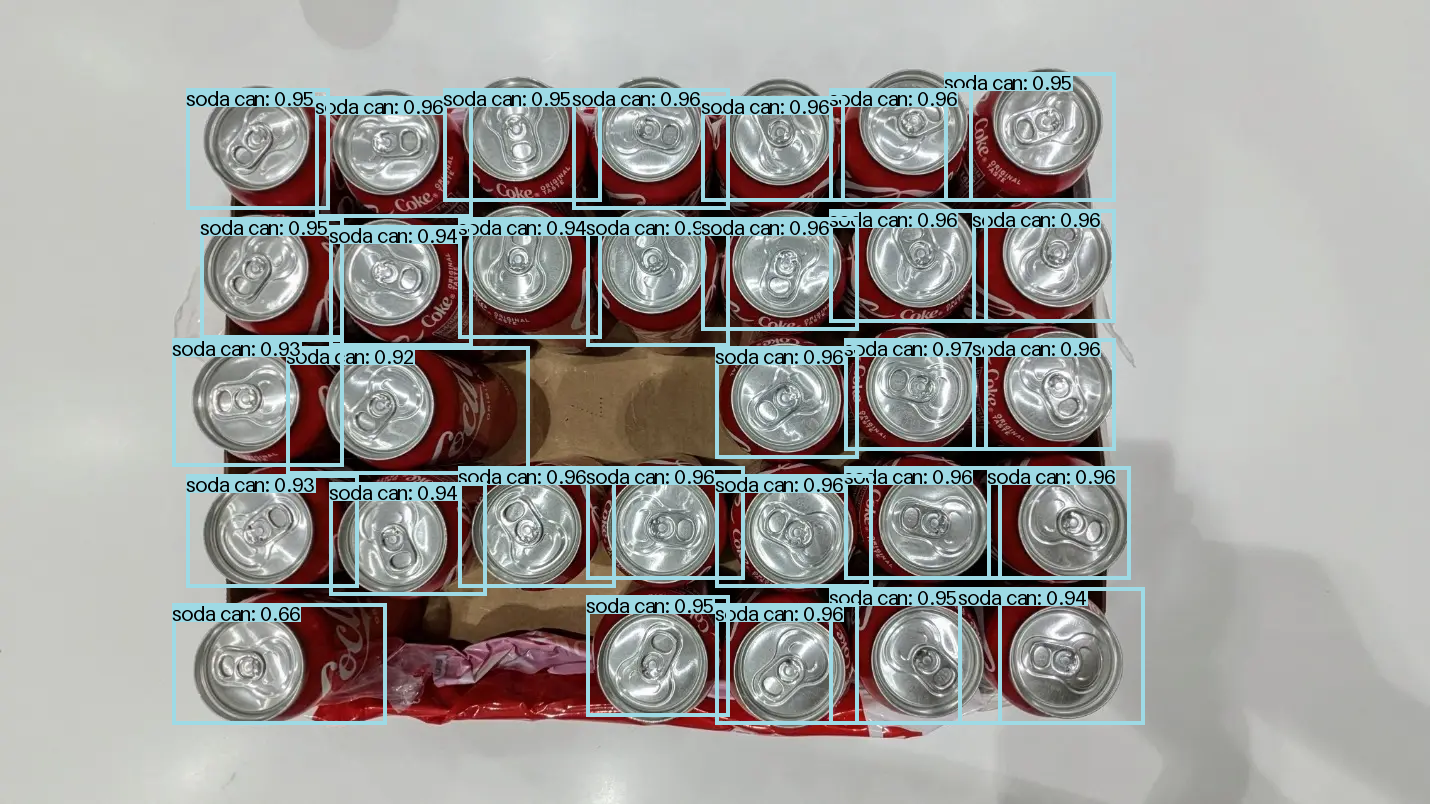

Number of cans detected: 31
Inventory percentage: 88.6%
Status: Healthy


In [9]:
from vision_agent.tools import load_image

                                                                                        
image = load_image(image_path)
annotated_image, inventory_data = analyze_soda_inventory(image)                                                  
                                                                                                                 
print(f"Number of cans detected: {inventory_data['total_cans']}")                                                
print(f"Inventory percentage: {inventory_data['inventory_percentage']}%")                                        
print(f"Status: {inventory_data['status']}")   

The result looks good. Let's try another image.

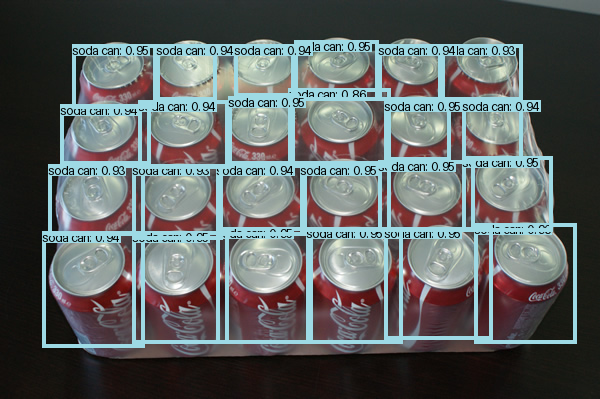

Number of cans detected: 24
Inventory percentage: 68.6%
Status: Healthy


In [14]:
test_image_url = "https://drive.usercontent.google.com/u/0/uc?id=12wGLC-P0CLxcxJLmQ6f7hu5BpbWM8Y9c"

test_image = load_image(test_image_url)
annotated_image, inventory_data = analyze_soda_inventory(test_image)

print(f"Number of cans detected: {inventory_data['total_cans']}")
print(f"Inventory percentage: {inventory_data['inventory_percentage']}%")
print(f"Status: {inventory_data['status']}")

## Customize the generated code

The Inventory percentage from the above result should be 100% but it's showing 68.6%. This is because the generated code harded coded the maximum capacity of the inventory to 35 cans.

Let's update the generated code to allow passing maximum capacity as a parameter.


In [16]:
def analyze_soda_inventory(image: np.ndarray, max_capacity: int=35) -> Tuple[np.ndarray, Dict]:                                          
    """                                                                                                            
    Analyzes an image of soda cans to count inventory and determine restocking needs.                              
                                                                                                                   
    Parameters:                                                                                                    
        image (np.ndarray): Input image containing soda cans to analyze                                            
        max_capacity (int): Maximum capacity of the inventory in the image

    Returns:                                                                                                       
        Tuple[np.ndarray, Dict]: Returns a tuple containing:                                                       
            - Annotated image with bounding boxes                                                                  
            - Dictionary with analysis results including:                                                          
                - total_cans: Number of cans detected                                                              
                - inventory_percentage: Current inventory level as percentage                                      
                - status: Current inventory status ("Healthy" or "Needs Restocking")                               
                - confidence_scores: List of confidence scores for each detection                                  
    """                                                                                                            
    # Detect soda cans in the image                                                                                
    detections = countgd_counting("soda can", image)                                                               
                                                                                                                   
    # Calculate inventory metrics                                                                                  
    total_cans = len(detections)                                                                                                                                                                     
    inventory_percentage = (total_cans / max_capacity) * 100                                                       
                                                                                                                   
    # Determine inventory status                                                                                   
    status = "Healthy" if inventory_percentage >= 50 else "Needs Restocking"                                       
                                                                                                                   
    # Draw bounding boxes on image                                                                                 
    image_with_boxes = overlay_bounding_boxes(image, detections)                                                   
                                                                                                                   
    # Extract confidence scores                                                                                    
    confidence_scores = [det['score'] for det in detections]                                                       
                                                                                                                   
    # Prepare results dictionary                                                                                   
    results = {                                                                                                    
        'total_cans': total_cans,                                                                                  
        'inventory_percentage': round(inventory_percentage, 1),                                                    
        'status': status,                                                                                          
        'confidence_scores': confidence_scores                                                                     
    }                                                                                                              
                                                                                                                   
    return image_with_boxes, results

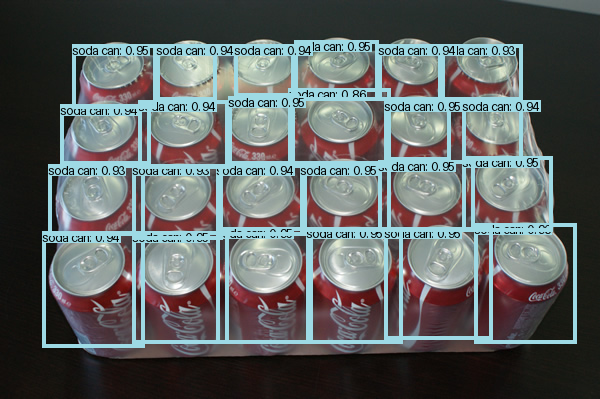

Number of cans detected: 24
Inventory percentage: 100.0%
Status: Healthy


In [17]:
test_image_url = "https://drive.usercontent.google.com/u/0/uc?id=12wGLC-P0CLxcxJLmQ6f7hu5BpbWM8Y9c"

test_image = load_image(test_image_url)
annotated_image, inventory_data = analyze_soda_inventory(test_image, max_capacity=24)

print(f"Number of cans detected: {inventory_data['total_cans']}")
print(f"Inventory percentage: {inventory_data['inventory_percentage']}%")
print(f"Status: {inventory_data['status']}")

It looks like the code works as expected.

## Conclusion

In this notebook, we demonstrated how to use VisionAgent to generate code that counts cans in an image. We also showed how to test the generated code to ensure it works as expected.

## Next Steps

- Try the VisionAgent web app at [va.landing.ai](https://va.landing.ai)
- Learn more about the VisionAgent ecosystem in [this blog](https://landing.ai/blog/introducing-visionagent-your-visual-ai-pilot)
- Check out the open source repo at [github.com/landing-ai/vision-agent](https://github.com/landing-ai/vision-agent)